# GP4QC

## Install Dependencies

In [1]:
%pip install pandas
%pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Load and Preprocess Data

In [2]:
import pandas as pd 

# To avoid consistency errors, copy the results from each server to 
# separate directories. The files from these directories are merged here.

icarus_experiments = pd.read_csv("results/icarus/experiments.csv", delimiter=";")
romulus_experiments = pd.read_csv("results/romulus/experiments.csv", delimiter=";")
all_experiments = pd.concat([icarus_experiments, romulus_experiments], ignore_index=True)

icarus_events = pd.read_csv("results/icarus/events.csv", delimiter=";")
romulus_events = pd.read_csv("results/romulus/events.csv", delimiter=";")
all_events = pd.concat([icarus_events, romulus_events], ignore_index=True)

icarus_fitness_values = pd.read_csv("results/icarus/fitness_values.csv", delimiter=";")
romulus_fitness_values = pd.read_csv("results/romulus/fitness_values.csv", delimiter=";")
all_fitness_values = pd.concat([icarus_fitness_values, romulus_fitness_values], ignore_index=True)

/var/folders/8q/rp8w2yvx1wq18fndqwtvqx340000gn/T/ipykernel_35444/1677399368.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Remove potential trailing white spaces from column names
all_experiments.columns = all_experiments.columns.str.strip()
all_events.columns = all_events.columns.str.strip()
all_fitness_values.columns = all_fitness_values.columns.str.strip()

In [4]:
from datetime import datetime

all_experiments["created_at"] = all_experiments["created_at"].apply(lambda x: datetime.fromisoformat(x.strip()))
all_events["created_at"] = all_events["created_at"].apply(lambda x: datetime.fromisoformat(x.strip()))
all_fitness_values["created_at"] = all_fitness_values["created_at"].apply(lambda x: datetime.fromisoformat(x.strip()))

In [5]:
def extract_fitness(fitness: str) -> str:
    fitness = fitness.split()[0]
    fitness = fitness.split(".")[-1]
    return fitness

all_experiments["fitness"] = all_experiments["fitness"].apply(lambda x: extract_fitness(x))

In [6]:
def create_configuration(fitness: str, description: str) -> str:
    if description.strip() == "":
        return f"{fitness}; no abstraction learning"
    else:
        return f"{fitness}; {description.strip()}"

all_experiments["configuration"] = all_experiments[["fitness", "description"]].apply(lambda row: create_configuration(row[0], row[1]), axis=1)

/var/folders/8q/rp8w2yvx1wq18fndqwtvqx340000gn/T/ipykernel_35444/2113213457.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  all_experiments["configuration"] = all_experiments[["fitness", "description"]].apply(lambda row: create_configuration(row[0], row[1]), axis=1)


In [7]:
all_experiments = all_experiments.sort_values(by=["created_at"], ascending=True)
all_events = all_events.sort_values(by=["created_at"], ascending=True)
all_fitness_values = all_fitness_values.sort_values(by=["created_at"], ascending=True)

## Select Test Case

In [8]:
EVALUATION_CASE = "grover" # bernstein, grover

experiments = all_experiments.loc[all_experiments["experiment_id"].str.startswith(EVALUATION_CASE)]
fitness_values = all_fitness_values.loc[all_fitness_values["experiment_id"].str.startswith(EVALUATION_CASE)]
events = all_events

## Visualize Fitness Value Changes Accross Experiments

Mean fitness values of grover: BaselineFitness; no abstraction learning


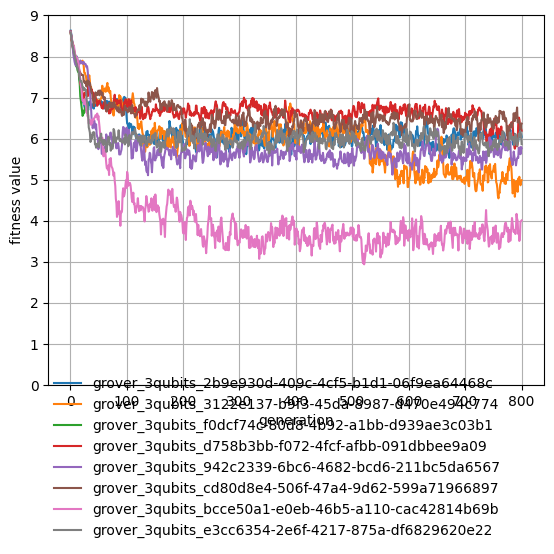

Mean fitness values of grover: IndirectQAFitness; no abstraction learning


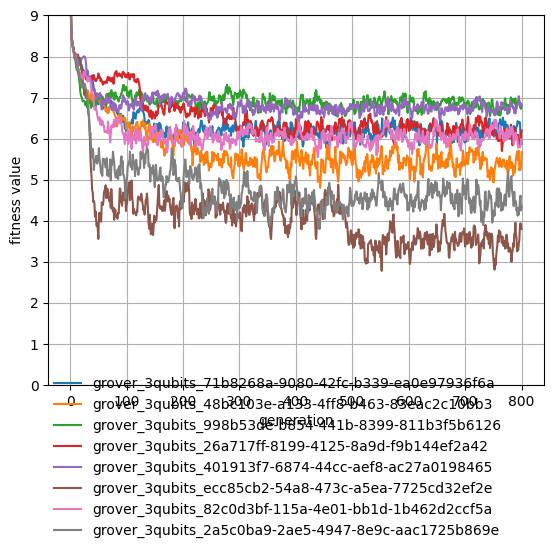

Mean fitness values of grover: DirectQAFitness; no abstraction learning


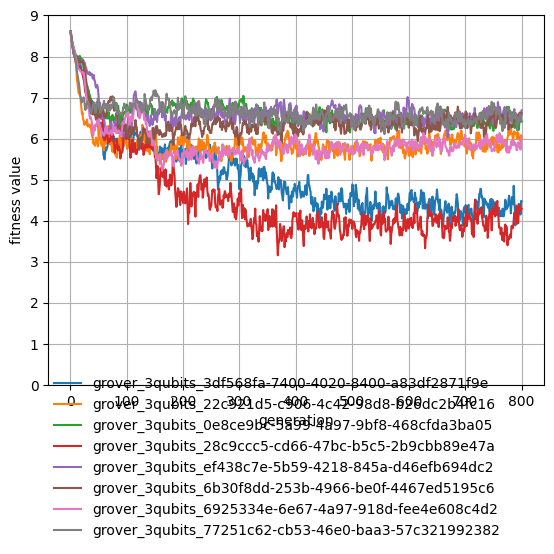

Mean fitness values of grover: BaselineFitness; abstraction learning enabled


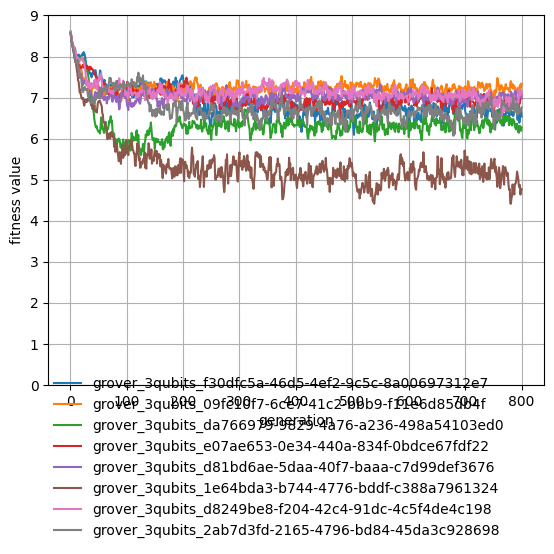

Mean fitness values of grover: IndirectQAFitness; abstraction learning enabled


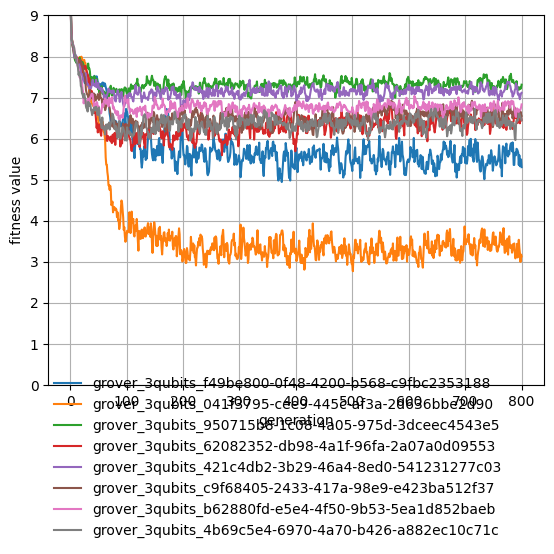

Mean fitness values of grover: DirectQAFitness; abstraction learning enabled


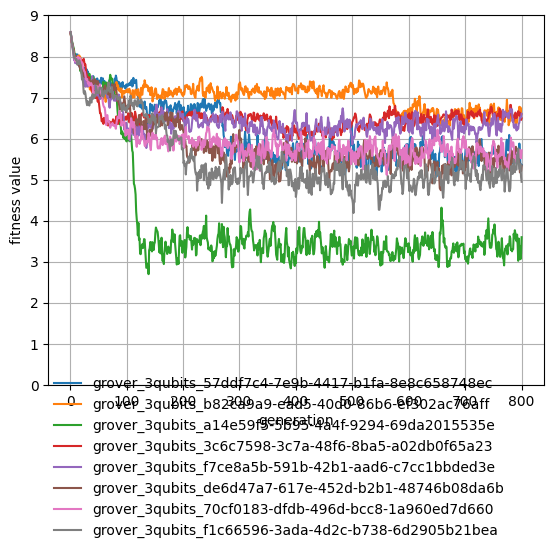

In [9]:
from matplotlib import pyplot as plt

# Mean fitness values
configurations = experiments["configuration"].unique()
experiment_ids = experiments["experiment_id"].unique()

for configuration in configurations:
    legend = []

    for experiment_id in experiment_ids:
        current_configuration = experiments.loc[experiments["experiment_id"] == experiment_id]["configuration"].tolist()[0].strip()
        if current_configuration != configuration:
            continue

        legend.append(experiment_id)
        
        current_fitness_values = fitness_values.loc[fitness_values["experiment_id"] == experiment_id]

        ax = plt.subplot()
        ax.plot(current_fitness_values["generation"], current_fitness_values["mean_fitness_value"])
        ax.set_xlabel("generation")
        ax.set_ylabel("fitness value")
        ax.set_ylim([0, 9])
        ax = plt.subplot()
    
    plt.legend(legend, bbox_to_anchor=(0, -0.43), loc='lower left', borderaxespad=0, framealpha=0)
    # plt.legend(legend, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, framealpha=0)
    plt.grid()
    print(f"Mean fitness values of {EVALUATION_CASE}: {configuration}")
    plt.savefig(f"results/{EVALUATION_CASE}_{configuration}_mean.png", bbox_inches='tight', transparent=True)
    plt.show()


Best fitness values of grover: BaselineFitness; no abstraction learning


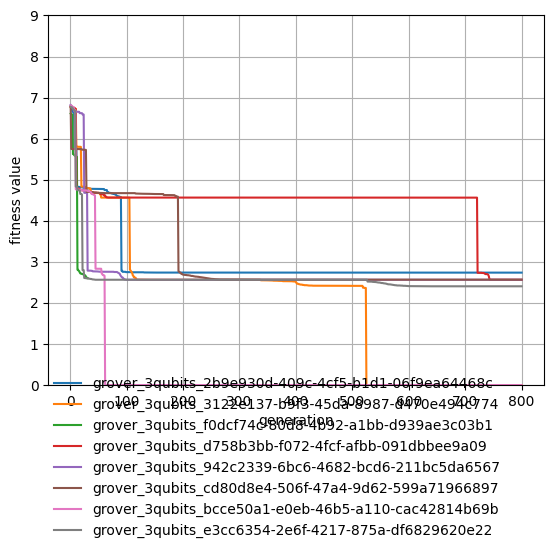

Best fitness values of grover: IndirectQAFitness; no abstraction learning


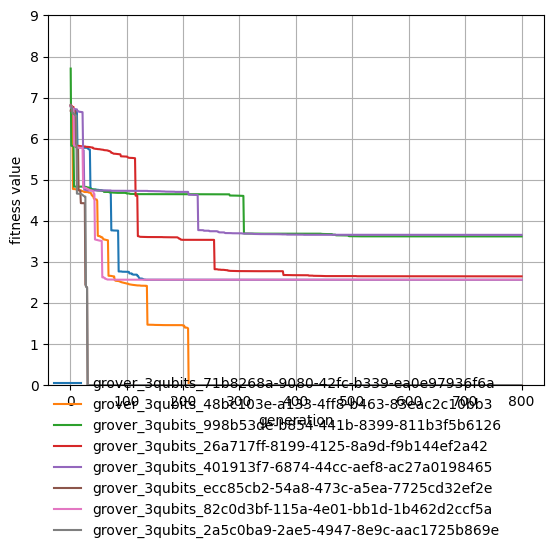

Best fitness values of grover: DirectQAFitness; no abstraction learning


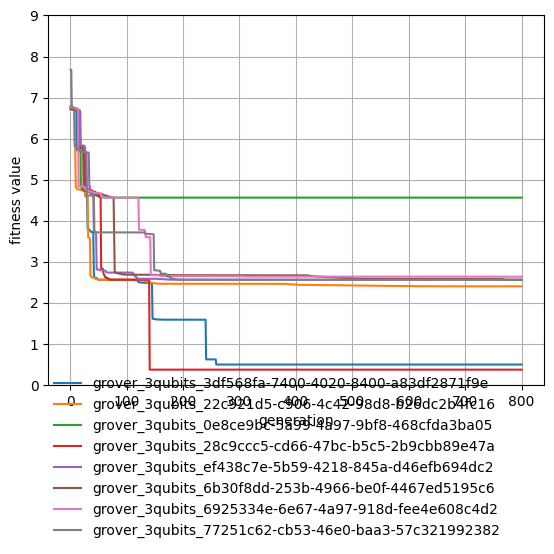

Best fitness values of grover: BaselineFitness; abstraction learning enabled


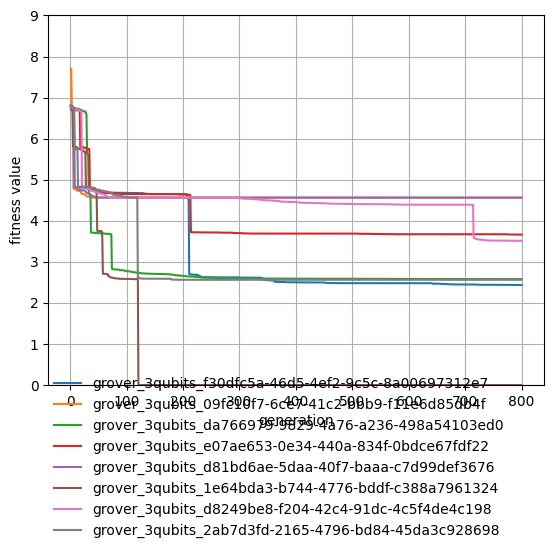

Best fitness values of grover: IndirectQAFitness; abstraction learning enabled


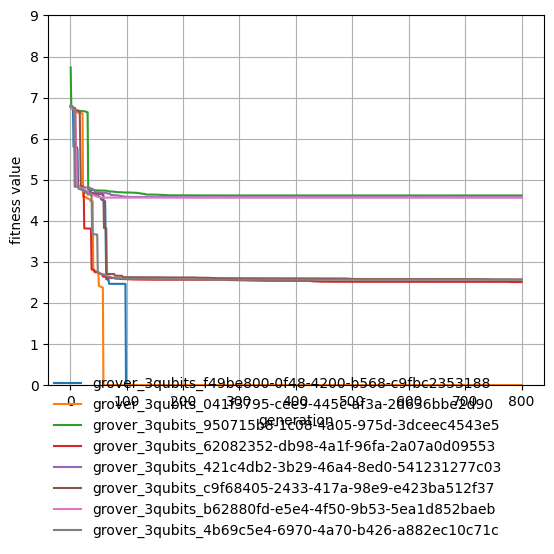

Best fitness values of grover: DirectQAFitness; abstraction learning enabled


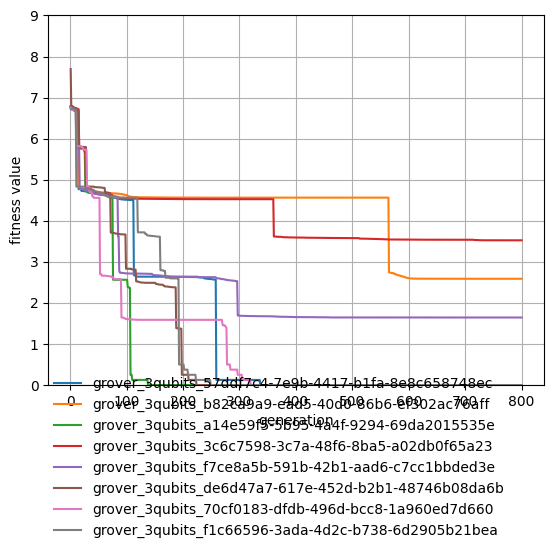

In [10]:
# Best fitness values
configurations = experiments["configuration"].unique()
experiment_ids = experiments["experiment_id"].unique()

for configuration in configurations:
    legend = []

    for experiment_id in experiment_ids:        
        current_configuration = experiments.loc[experiments["experiment_id"] == experiment_id]["configuration"].tolist()[0].strip()
        if current_configuration != configuration:
            continue

        legend.append(experiment_id)
        
        current_fitness_values = fitness_values.loc[fitness_values["experiment_id"] == experiment_id]

        ax = plt.subplot()
        ax.plot(current_fitness_values["generation"], current_fitness_values["best_fitness_value"])
        ax.set_xlabel("generation")
        ax.set_ylabel("fitness value")
        ax.set_ylim([0, 9])
        ax = plt.subplot()
    
    # plt.legend(legend, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, framealpha=0)
    plt.legend(legend, bbox_to_anchor=(0, -0.43), loc='lower left', borderaxespad=0, framealpha=0)
    plt.grid()
    print(f"Best fitness values of {EVALUATION_CASE}: {configuration}")
    plt.savefig(f"results/{EVALUATION_CASE}_{configuration}_best.png", bbox_inches='tight', transparent=True)
    plt.show()


## Visualize Fitness Value Averages

Averaged mean fitness values of BaselineFitness; no abstraction learning


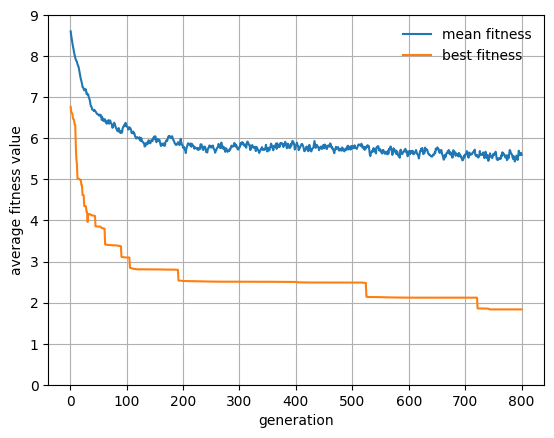

Averaged mean fitness values of IndirectQAFitness; no abstraction learning


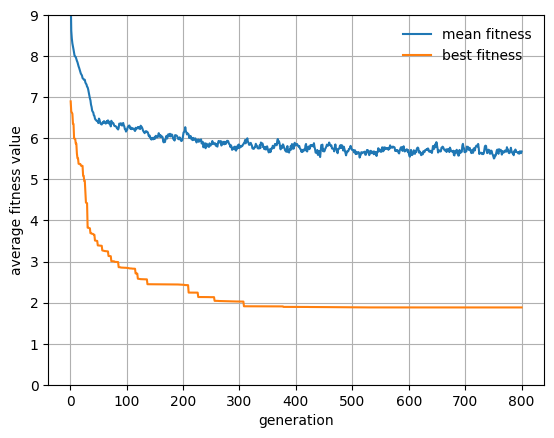

Averaged mean fitness values of DirectQAFitness; no abstraction learning


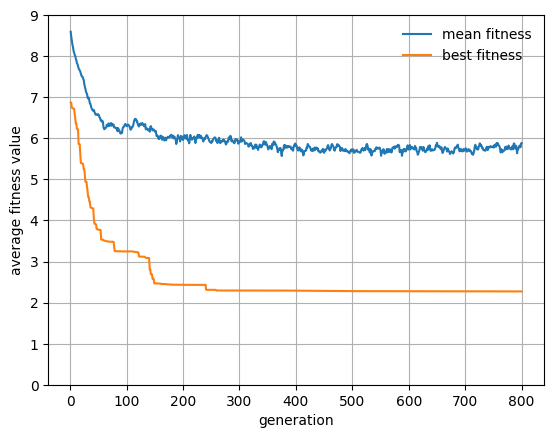

Averaged mean fitness values of BaselineFitness; abstraction learning enabled


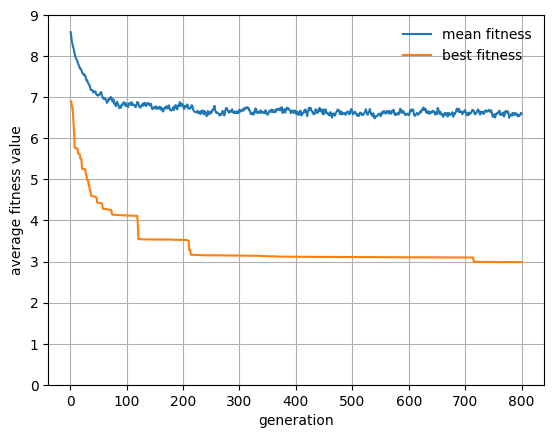

Averaged mean fitness values of IndirectQAFitness; abstraction learning enabled


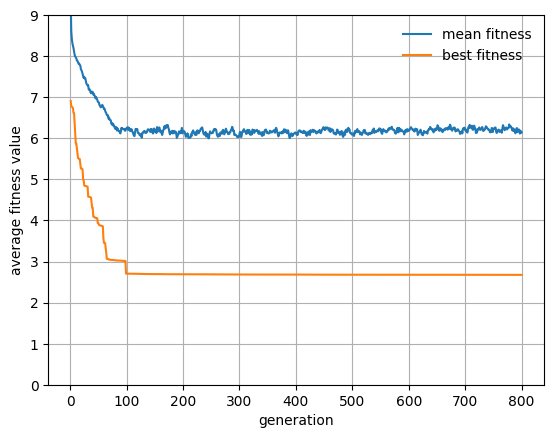

Averaged mean fitness values of DirectQAFitness; abstraction learning enabled


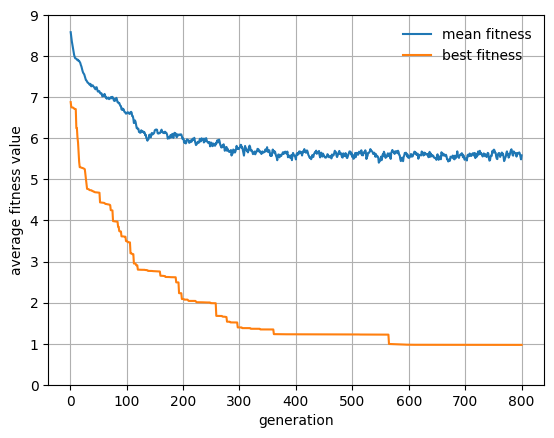

In [11]:
# Fitness value averages

configurations = experiments["configuration"].unique()
experiment_ids = experiments["experiment_id"].unique()

for configuration in configurations:
    configuration_experiment_ids = []

    for experiment_id in experiment_ids:        
        current_configuration = experiments.loc[experiments["experiment_id"] == experiment_id]["configuration"].tolist()[0].strip()
        
        if current_configuration == configuration:
            configuration_experiment_ids.append(experiment_id)
    
    configuration_fitness_values = fitness_values.loc[fitness_values["experiment_id"].isin(configuration_experiment_ids)]

    generations = configuration_fitness_values["generation"].unique()
    average_mean_fitness_values = configuration_fitness_values.groupby(["generation"])["mean_fitness_value"].mean()
    average_best_fitness_values = configuration_fitness_values.groupby(["generation"])["best_fitness_value"].mean()
    
    ax = plt.subplot()
    ax.plot(generations, average_mean_fitness_values)
    ax.plot(generations, average_best_fitness_values)
    ax.set_xlabel("generation")
    ax.set_ylabel("average fitness value")
    ax.set_ylim([0, 9])
    ax = plt.subplot()

    plt.grid()
    plt.legend(["mean fitness", "best fitness"], framealpha=0)
    print(f"Averaged mean fitness values of {configuration}")
    plt.savefig(f"results/{EVALUATION_CASE}_{configuration}_averaged.png", bbox_inches='tight', transparent=True)
    plt.show()
        


## Visualize Fitness Value Averages in One Graph

Averaged mean fitness values of DirectQAFitness; abstraction learning enabled


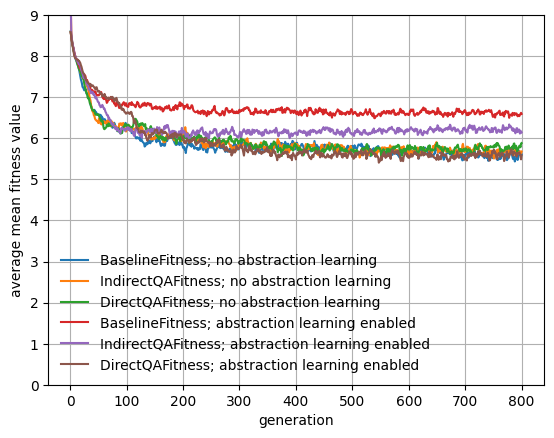

In [12]:
# mean fitness value averages in one graph

configurations = experiments["configuration"].unique()
experiment_ids = experiments["experiment_id"].unique()

for configuration in configurations:
    configuration_experiment_ids = []

    for experiment_id in experiment_ids:        
        current_configuration = experiments.loc[experiments["experiment_id"] == experiment_id]["configuration"].tolist()[0].strip()
        
        if current_configuration == configuration:
            configuration_experiment_ids.append(experiment_id)
    
    configuration_fitness_values = fitness_values.loc[fitness_values["experiment_id"].isin(configuration_experiment_ids)]

    generations = configuration_fitness_values["generation"].unique()
    average_mean_fitness_values = configuration_fitness_values.groupby(["generation"])["mean_fitness_value"].mean()
    
    ax = plt.subplot()
    ax.plot(generations, average_mean_fitness_values)
    ax.set_xlabel("generation")
    ax.set_ylabel("average mean fitness value")
    ax.set_ylim([0, 9])
    ax = plt.subplot()

plt.grid()
plt.legend(configurations, framealpha=0)
print(f"Averaged mean fitness values of {configuration}")
plt.savefig(f"results/{EVALUATION_CASE}_mean_averaged.png", bbox_inches='tight', transparent=True)
plt.show()
        


Averaged best fitness values of DirectQAFitness; abstraction learning enabled


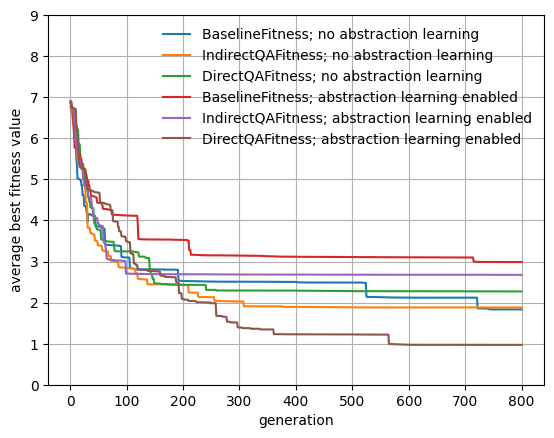

In [13]:
# best fitness value averages in one graph

configurations = experiments["configuration"].unique()
experiment_ids = experiments["experiment_id"].unique()

for configuration in configurations:
    configuration_experiment_ids = []

    for experiment_id in experiment_ids:        
        current_configuration = experiments.loc[experiments["experiment_id"] == experiment_id]["configuration"].tolist()[0].strip()
        
        if current_configuration == configuration:
            configuration_experiment_ids.append(experiment_id)
    
    configuration_fitness_values = fitness_values.loc[fitness_values["experiment_id"].isin(configuration_experiment_ids)]

    generations = configuration_fitness_values["generation"].unique()
    average_best_fitness_values = configuration_fitness_values.groupby(["generation"])["best_fitness_value"].mean()
    
    ax = plt.subplot()
    ax.plot(generations, average_best_fitness_values)
    ax.set_xlabel("generation")
    ax.set_ylabel("average best fitness value")
    ax.set_ylim([0, 9])
    ax = plt.subplot()

plt.grid()
plt.legend(configurations, framealpha=0)
print(f"Averaged best fitness values of {configuration}")
plt.savefig(f"results/{EVALUATION_CASE}_best_averaged.png", bbox_inches='tight', transparent=True)
plt.show()
        


## Visualize Fitness Value Averages by Treatment

Averaged mean fitness values by fitness function


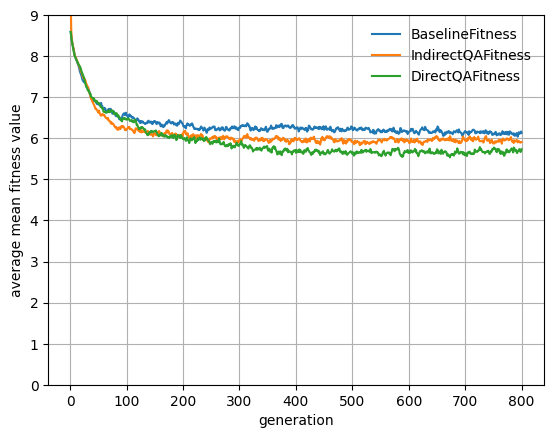

In [14]:
# mean fitness value averages in one graph grouped by fitness

fitness_functions = experiments["fitness"].unique()
experiment_ids = experiments["experiment_id"].unique()

for fitness_function in fitness_functions:
    relevant_experiment_ids = []

    for experiment_id in experiment_ids:        
        current_fitness_function = experiments.loc[experiments["experiment_id"] == experiment_id]["fitness"].tolist()[0].strip()
        
        if current_fitness_function == fitness_function:
            relevant_experiment_ids.append(experiment_id)
    
    relevant_fitness_values = fitness_values.loc[fitness_values["experiment_id"].isin(relevant_experiment_ids)]

    generations = relevant_fitness_values["generation"].unique()
    average_best_fitness_values = relevant_fitness_values.groupby(["generation"])["mean_fitness_value"].mean()
    
    ax = plt.subplot()
    ax.plot(generations, average_best_fitness_values)
    ax.set_xlabel("generation")
    ax.set_ylabel("average mean fitness value")
    ax.set_ylim([0, 9])
    ax = plt.subplot()

plt.grid()
plt.legend(fitness_functions, framealpha=0)
print(f"Averaged mean fitness values by fitness function")
plt.savefig(f"results/{EVALUATION_CASE}_fitness_function_mean_averaged.png", bbox_inches='tight', transparent=True)
plt.show()

Averaged best fitness values by fitness function


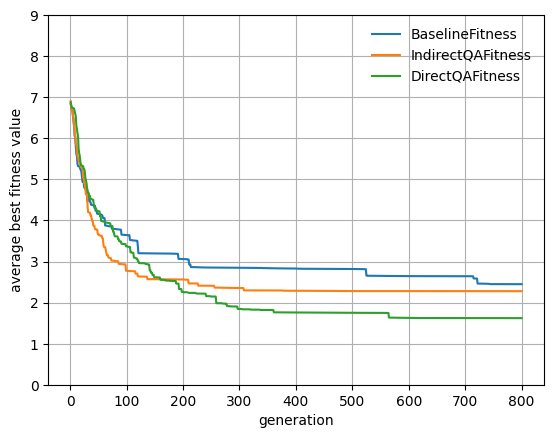

In [15]:
# best fitness value averages in one graph grouped by fitness

fitness_functions = experiments["fitness"].unique()
experiment_ids = experiments["experiment_id"].unique()

for fitness_function in fitness_functions:
    relevant_experiment_ids = []

    for experiment_id in experiment_ids:        
        current_fitness_function = experiments.loc[experiments["experiment_id"] == experiment_id]["fitness"].tolist()[0].strip()
        
        if current_fitness_function == fitness_function:
            relevant_experiment_ids.append(experiment_id)
    
    relevant_fitness_values = fitness_values.loc[fitness_values["experiment_id"].isin(relevant_experiment_ids)]

    generations = relevant_fitness_values["generation"].unique()
    average_best_fitness_values = relevant_fitness_values.groupby(["generation"])["best_fitness_value"].mean()
    
    ax = plt.subplot()
    ax.plot(generations, average_best_fitness_values)
    ax.set_xlabel("generation")
    ax.set_ylabel("average best fitness value")
    ax.set_ylim([0, 9])
    ax = plt.subplot()

plt.grid()
plt.legend(fitness_functions, framealpha=0)
print(f"Averaged best fitness values by fitness function")
plt.savefig(f"results/{EVALUATION_CASE}_fitness_function_best_averaged.png", bbox_inches='tight', transparent=True)
plt.show()
        

Averaged mean fitness values grouped by abstraction learning


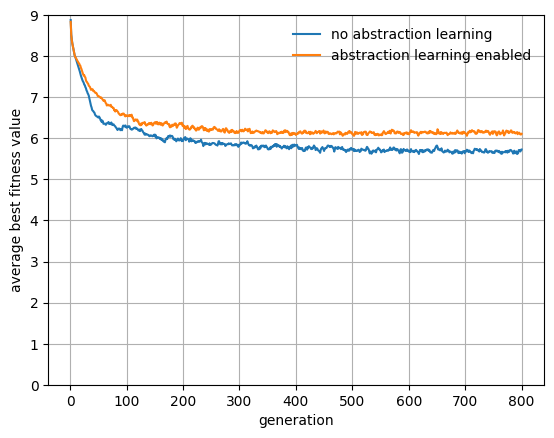

In [16]:
# mean fitness value averages in one graph grouped by abstraction learning

descriptions = experiments["description"].unique()
descriptions = [description.strip() for description in descriptions]

experiment_ids = experiments["experiment_id"].unique()

for description in descriptions:
    relevant_experiment_ids = []

    for experiment_id in experiment_ids:        
        current_description = experiments.loc[experiments["experiment_id"] == experiment_id]["description"].tolist()[0].strip()

        if current_description == description:
            relevant_experiment_ids.append(experiment_id)
    
    relevant_fitness_values = fitness_values.loc[fitness_values["experiment_id"].isin(relevant_experiment_ids)]

    generations = relevant_fitness_values["generation"].unique()
    average_best_fitness_values = relevant_fitness_values.groupby(["generation"])["mean_fitness_value"].mean()
    
    ax = plt.subplot()
    ax.plot(generations, average_best_fitness_values)
    ax.set_xlabel("generation")
    ax.set_ylabel("average best fitness value")
    ax.set_ylim([0, 9])
    ax = plt.subplot()

for i in range(len(descriptions)):
    if descriptions[i] == "":
        descriptions[i] = "no abstraction learning"

plt.grid()
plt.legend(descriptions, framealpha=0)
print(f"Averaged mean fitness values grouped by abstraction learning")
plt.savefig(f"results/{EVALUATION_CASE}_abstraction_learning_mean_averaged.png", bbox_inches='tight', transparent=True)
plt.show()

Averaged best fitness values grouped by abstraction learning


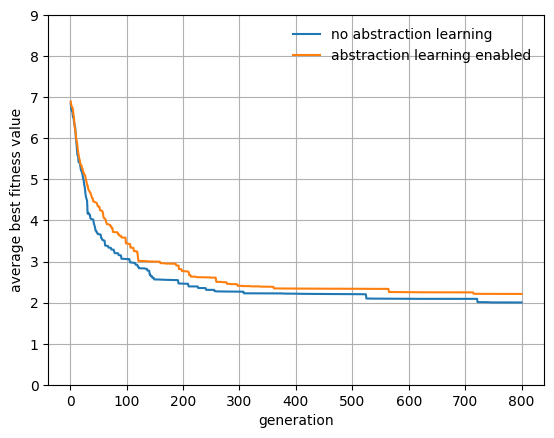

In [17]:
# best fitness value averages in one graph grouped by abstraction learning

descriptions = experiments["description"].unique()
descriptions = [description.strip() for description in descriptions]

experiment_ids = experiments["experiment_id"].unique()

for description in descriptions:
    relevant_experiment_ids = []

    for experiment_id in experiment_ids:        
        current_description = experiments.loc[experiments["experiment_id"] == experiment_id]["description"].tolist()[0].strip()

        if current_description == description:
            relevant_experiment_ids.append(experiment_id)
    
    relevant_fitness_values = fitness_values.loc[fitness_values["experiment_id"].isin(relevant_experiment_ids)]

    generations = relevant_fitness_values["generation"].unique()
    average_best_fitness_values = relevant_fitness_values.groupby(["generation"])["best_fitness_value"].mean()
    
    ax = plt.subplot()
    ax.plot(generations, average_best_fitness_values)
    ax.set_xlabel("generation")
    ax.set_ylabel("average best fitness value")
    ax.set_ylim([0, 9])
    ax = plt.subplot()

for i in range(len(descriptions)):
    if descriptions[i] == "":
        descriptions[i] = "no abstraction learning"

plt.grid()
plt.legend(descriptions, framealpha=0)
print(f"Averaged best fitness values grouped by abstraction learning")
plt.savefig(f"results/{EVALUATION_CASE}_abstraction_learning_best_averaged.png", bbox_inches='tight', transparent=True)
plt.show()

## Print the best gate sequence of each experiment

In [18]:
for i, experiment in experiments.iterrows():
    print(f"\nExperiment Id: {experiment['experiment_id']}")
    print(f"\tConfiguration: {experiment['configuration']}")
    print(f"\tLast commit id: {experiment['last_commit_id']}")

    current_fitness_values = fitness_values.loc[fitness_values["experiment_id"] == experiment["experiment_id"]]
    last_fitness_row = current_fitness_values[current_fitness_values["generation"] == current_fitness_values["generation"].max()]
    
    print(f"\tBest fitness value: {last_fitness_row['best_fitness_value'].tolist()[0]}")
    print(f"\tBest chromosome: {last_fitness_row['best_chromosome'].tolist()[0]}")



Experiment Id: grover_3qubits_2b9e930d-409c-4cf5-b1d1-06f9ea64468c
	Configuration: BaselineFitness; no abstraction learning
	Last commit id:  016489a2b9c58ccf0eb818f6eafc9cf4fee2778a
	Best fitness value: 2.7380662945214462
	Best chromosome:  [cx(control=0,target=1), crx(theta=3.1415897441286376,control=2,target=1), rz(theta=-3.1057422463666335,target=1), rz(theta=-3.141592653589793,target=1), ry(theta=-2.254369266484492,target=0), oracle(target1=2,target2=0,target3=1), y_layer(), rz(theta=-0.3385159150708108,target=2), h(target=1), swap_layer(), rz(theta=2.5289152883063983,target=0), h_layer(), ry(theta=-1.9003983408928566,target=1), cx(control=2,target=1), ry(theta=-3.141592653589793,target=2), oracle(target1=2,target2=0,target3=1), cx(control=1,target=2), cry(theta=-1.5660205306448192,control=2,target=0), cy(control=0,target=1), cx(control=0,target=2), y(target=1), ccz(control1=2,control2=1,target=0), cx(control=1,target=2), x(target=0), ccz(control1=0,control2=1,target=2), h(target

In [19]:
# Best gate sequence of each configuration
import numpy as np

configurations = experiments["configuration"].unique()
experiment_ids = experiments["experiment_id"].unique()

for configuration in configurations:
    best_encountered_fitness_value = np.inf
    best_encountered_experiment_id = None 
    best_encountered_chromosome = None

    for experiment_id in experiment_ids:        
        current_configuration = experiments.loc[experiments["experiment_id"] == experiment_id]["configuration"].tolist()[0].strip()
        if current_configuration != configuration:
            continue

        current_fitness_values = fitness_values.loc[fitness_values["experiment_id"] == experiment_id]
        last_fitness_row = current_fitness_values[current_fitness_values["generation"] == current_fitness_values["generation"].max()]
        best_fitness_value = last_fitness_row['best_fitness_value'].tolist()[0]

        best_chromosome = last_fitness_row['best_chromosome'].tolist()[0]

        if best_fitness_value < best_encountered_fitness_value:
            best_encountered_fitness_value = best_fitness_value
            best_encountered_experiment_id = experiment_id
            best_encountered_chromosome = best_chromosome

    print(f"\nConfiguration: {configuration}")
    print(f"\tExperiment Id: {best_encountered_experiment_id}")
    print(f"\tBest fitness value: {best_encountered_fitness_value}")
    print(f"\tBest chromosome: {best_encountered_chromosome}")


Configuration: BaselineFitness; no abstraction learning
	Experiment Id: grover_3qubits_bcce50a1-e0eb-46b5-a110-cac42814b69b
	Best fitness value: 0.00018
	Best chromosome:  [id(target=2), id(target=2), id(target=2), h(target=0), swap_layer(), cry(theta=3.141592653589793,control=2,target=1), h(target=1), y(target=1), oracle(target1=0,target2=1,target3=2), id(target=0), id(target=0), x_layer(), oracle(target1=1,target2=2,target3=0), id(target=1), id(target=0), swap(target1=2,target2=1), id(target=2), h_layer(), id(target=0), oracle(target1=2,target2=1,target3=0), id(target=2), id(target=0), id(target=2), ry(theta=-1.1860437925435225,target=0), cx(control=0,target=2), id(target=1), id(target=0), cy(control=0,target=1), id(target=1), id(target=1)]

Configuration: IndirectQAFitness; no abstraction learning
	Experiment Id: grover_3qubits_2a5c0ba9-2ae5-4947-8e9c-aac1725b869e
	Best fitness value: 0.00021
	Best chromosome:  [id(target=1), id(target=1), h_layer(), id(target=2), oracle(target1=0,